# Generating ATL03 photon classifications using ATL08 and YAPC

Plot ATL03 data with different classifications for a region over the Grand Mesa, CO region 

- [ATL08 Land and Vegetation Height product](https://nsidc.org/data/atl08) photon classification
- Experimental YAPC (Yet Another Photon Classification) photon-density-based classification

### What is demonstrated

* The `icesat2.atl03sp` API is used to perform a SlideRule parallel subsetting request of the Grand Mesa region
* The `earthdata.cmr` API's is used to find specific ATL03 granules corresponding to the Grand Mesa region
* The `matplotlib` package is used to plot the ATL03 data subset by SlideRule

In [1]:
import warnings
warnings.filterwarnings("ignore") # suppress warnings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sliderule import sliderule, icesat2, earthdata

In [3]:
sliderule.init(verbose=True)

True

## Intro
This notebook demonstrates how to use the SlideRule Icesat-2 API to retrieve ATL03 data with two different classifications, one based on the external ATL08-product classifications, designed to distinguish between vegetation and ground returns, and the other based on the experimental YAPC (Yet Another Photon Class) algorithm.

### Retrieve ATL03 elevations with ATL08 classifications

define a polygon to encompass Grand Mesa, and pick an ATL03 granule that has good coverage over the top of the mesa.  Note that this granule was captured at night, under clear-sky conditions.  Other granules are unlikely to have results as clear s these.

In [4]:
%%time

# build sliderule parameters for ATL03 subsetting request
parms = {
    # processing parameters
    "srt": icesat2.SRT_LAND,
    "len": 20,
    "res": 20,
    # classification and checks
    # still return photon segments that fail checks
    "pass_invalid": True,
    # all photons
    "cnf": -2,
    # all land classification flags
    "atl08_class": ["atl08_noise", "atl08_ground", "atl08_canopy", "atl08_top_of_canopy", "atl08_unclassified"],
    # all photons
    "yapc": dict(knn=0, win_h=6, win_x=11, min_ph=4, score=0),
}

# ICESat-2 data release
release = '006'

# region of interest
poly = [
  {'lat': 39.34603060272382, 'lon': -108.40601489205419},
  {'lat': 39.32770853617356, 'lon': -107.68485163209928},
  {'lat': 38.770676045922684, 'lon': -107.71081820956682},
  {'lat': 38.788639821001155, 'lon': -108.42635020791396},
  {'lat': 39.34603060272382, 'lon': -108.40601489205419}
]

# time bounds for CMR query
time_start = '2019-11-14'
time_end = '2019-11-15'

# find granule for each region of interest
granules_list = earthdata.cmr(short_name='ATL03', polygon=poly, time_start=time_start, time_end=time_end, version=release)

# create geodataframe
gdf = sliderule.run("atl03x", parms, aoi=poly, resources=granules_list)

HTTP Request Error: HTTP Error 400: Bad Request
Using simplified polygon (for CMR request only!), 5 points using tolerance of 0.0001
Starting proxy for atl03x to process 1 resource(s) with 1 thread(s)
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt1l] with 66779 rows and 14 columns
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt2l] with 66801 rows and 14 columns
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt3l] with 63781 rows and 14 columns
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt2r] with 207158 rows and 14 columns
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt3r] with 255932 rows and 14 columns
request <AppServer.78978> on ATL03_20191114034331_07370502_006_01.h5 generated dataframe [gt1r] with 265252 rows and 14 columns
Successfully completed processing 

CPU times: user 1.47 s, sys: 359 ms, total: 1.83 s
Wall time: 23.1 s


In [5]:
gdf

region  gt  spacecraft_velocity  \
time_ns                                                          
2019-11-14 03:46:35.872218112       2  50          7113.586426   
2019-11-14 03:46:35.872218112       2  50          7113.586426   
2019-11-14 03:46:35.872317952       2  50          7113.586426   
2019-11-14 03:46:35.872317952       2  50          7113.586426   
2019-11-14 03:46:35.872418048       2  50          7113.586426   
...                               ...  ..                  ...   
2019-11-14 03:46:44.991418368       2  20          7113.345215   
2019-11-14 03:46:44.991418368       2  20          7113.345215   
2019-11-14 03:46:44.991418368       2  20          7113.345215   
2019-11-14 03:46:44.991418368       2  20          7113.345215   
2019-11-14 03:46:44.991418368       2  20          7113.345215   

                               solar_elevation  yapc_score  rgt  ph_index  \
time_ns                                                                     
2019-11-14 03:46:35.872218112       -44.078053         239  737   1075952   
2019-11-14 03:46:35.872218112       -44.078053         236  737   1075953   
2019-11-14 03:46:35.872317952       -44.078053         236  737   1075954   
2019-11-14 03:46:35.872317952       -44.078053         231  737   1075955   
2019-11-14 03:46:35.872418048       -44.078053         235  737   1075956   
...                                        ...         ...  ...       ...   
2019-11-14 03:46:44.991418368       -43.875050         122  737   4680202   
2019-11-14 03:46:44.991418368       -43.875050         116  737   4680203   
2019-11-14 03:46:44.991418368       -43.875050          69  737   4680204   
2019-11-14 03:46:44.991418368       -43.875050         128  737   4680205   
2019-11-14 03:46:44.991418368       -43.875050         122  737   4680206   

                                    height  atl08_class  spot         x_atc  \
time_ns                                                                       
2019-11-14 03:46:35.872218112  1507.619995            1     2  4.314530e+06   
2019-11-14 03:46:35.872218112  1507.708496            1     2  4.314530e+06   
2019-11-14 03:46:35.872317952  1507.787231            1     2  4.314531e+06   
2019-11-14 03:46:35.872317952  1508.115601            1     2  4.314531e+06   
2019-11-14 03:46:35.872418048  1508.048218            1     2  4.314532e+06   
...                                    ...          ...   ...           ...   
2019-11-14 03:46:44.991418368  1551.664429            1     5  4.376748e+06   
2019-11-14 03:46:44.991418368  1552.543823            0     5  4.376748e+06   
2019-11-14 03:46:44.991418368  1547.385010            0     5  4.376748e+06   
2019-11-14 03:46:44.991418368  1549.545044            0     5  4.376748e+06   
2019-11-14 03:46:44.991418368  1551.820801            1     5  4.376748e+06   

                                     y_atc  srcid  cycle  atl03_cnf  \
time_ns                                                               
2019-11-14 03:46:35.872218112 -3158.350098      0      5          4   
2019-11-14 03:46:35.872218112 -3158.349365      0      5          4   
2019-11-14 03:46:35.872317952 -3158.351807      0      5          4   
2019-11-14 03:46:35.872317952 -3158.349365      0      5          4   
2019-11-14 03:46:35.872418048 -3158.352783      0      5          4   
...                                    ...    ...    ...        ...   
2019-11-14 03:46:44.991418368  3145.825928      5      5          4   
2019-11-14 03:46:44.991418368  3145.820068      5      5          4   
2019-11-14 03:46:44.991418368  3145.854004      5      5          4   
2019-11-14 03:46:44.991418368  3145.839844      5      5          4   
2019-11-14 03:46:44.991418368  3145.824707      5      5          4   

                               background_rate  quality_ph  \
time_ns                                                      
2019-11-14 03:46:35.872218112      5359.785645           0   
2019-11-14 03:46:35.872218112   

### Reduce GeoDataFrame to plot a single beam
- Convert coordinate reference system to compound projection

In [6]:
gdf.keys()

Index(['region', 'gt', 'spacecraft_velocity', 'solar_elevation', 'yapc_score',
       'rgt', 'ph_index', 'height', 'atl08_class', 'spot', 'x_atc', 'y_atc',
       'srcid', 'cycle', 'atl03_cnf', 'background_rate', 'quality_ph',
       'geometry'],
      dtype='object')

In [7]:
def reduce_dataframe(gdf, RGT=None, GT=None, spot=None, cycle=None, crs=4326):
    D3 = gdf.to_crs(crs) # convert coordinate reference system
    if RGT is not None:
        D3 = D3[D3["rgt"] == RGT]
    if GT is not None:
        D3 = D3[D3["gt"] == GT]
    if spot is not None:
        D3 = D3[D3["spot"] == spot]
    if cycle is not None:
        D3 = D3[D3["cycle"] == cycle]
    return D3

In [8]:
project_srs = "EPSG:26912+EPSG:5703"
D3 = reduce_dataframe(gdf, RGT=737, spot=1, crs=project_srs)

### Inspect Coordinate Reference System

In [9]:
D3.crs

<Compound CRS: EPSG:26912+EPSG:5703>
Name: NAD83 / UTM zone 12N + NAVD88 height
Axis Info [cartesian|vertical]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
- H[up]: Gravity-related height (metre)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Sub CRS:
- NAD83 / UTM zone 12N
- NAVD88 height

### Plot the ATL08 classifications

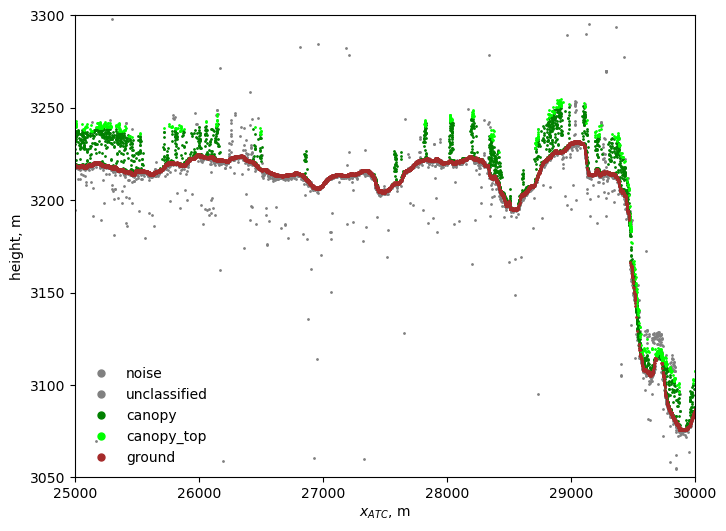

In [10]:
plt.figure(figsize=[8,6])

colors={0:['gray', 'noise'],
        4:['gray','unclassified'],
        2:['green','canopy'],
        3:['lime', 'canopy_top'],
        1:['brown', 'ground']}
d0=np.min(D3['x_atc'])
for class_val, color_name in colors.items():
    ii=D3['atl08_class']==class_val
    plt.plot(D3['x_atc'][ii]-d0, D3['height'][ii],'o',
         markersize=1, color=color_name[0], label=color_name[1])
hl=plt.legend(loc=3, frameon=False, markerscale=5)
plt.gca().set_xlim([25000, 30000])
plt.gca().set_ylim([3050, 3300])

plt.ylabel('height, m')
plt.xlabel('$x_{ATC}$, m');

### Plot the YAPC classifications

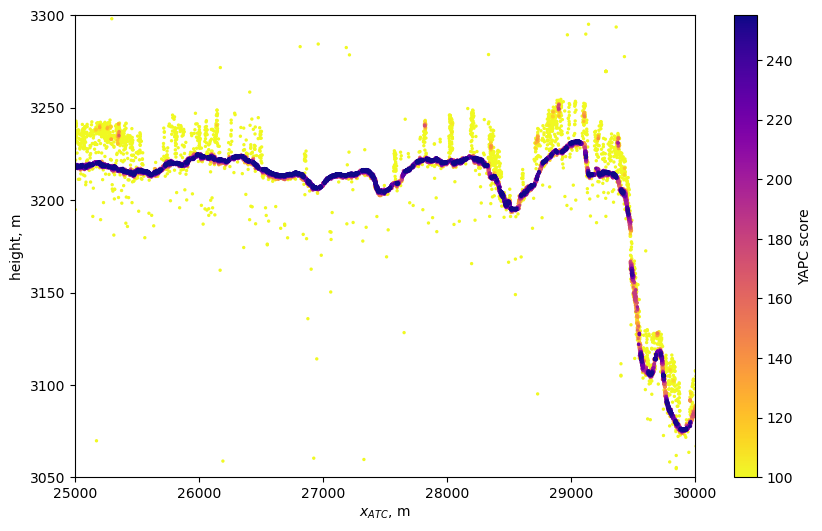

In [11]:
plt.figure(figsize=[10,6])

d0=np.min(D3['x_atc'])
ii=np.argsort(D3['yapc_score'])
plt.scatter(D3['x_atc'][ii]-d0,
    D3['height'][ii],2, c=D3['yapc_score'][ii],
    vmin=100, vmax=255, cmap='plasma_r')
plt.colorbar(label='YAPC score')
plt.gca().set_xlim([25000, 30000])
plt.gca().set_ylim([3050, 3300])

plt.ylabel('height, m')
plt.xlabel('$x_{ATC}$, m');